# 第2章 確率分布と統計モデルの最尤推定

Q. 確率分布とは？


A.

* 統計モデルの本質的な部品
* データに見られる様々な「ばらつき」を表現

## 2.1.例題：種子数の統計モデリング
* データの特徴は、後で確率分布を選ぶときの手がかりとなる
* データ解析で最も重要なのは、そのデータを様々な方法で図示してみること 

* データは[こちら](http://hosho.ees.hokudai.ac.jp/~kubo/ce/IwanamiBook.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sct
from rpy2.robjects import r
%matplotlib inline

### データを読み込んで表示する

In [2]:
r['load']('data.RData')
data = pd.Series(np.array(r['data']))

In [3]:
data

0     2.0
1     2.0
2     4.0
3     6.0
4     4.0
5     5.0
6     2.0
7     3.0
8     1.0
9     2.0
10    0.0
11    4.0
12    3.0
13    3.0
14    3.0
15    3.0
16    4.0
17    2.0
18    7.0
19    2.0
20    4.0
21    3.0
22    3.0
23    3.0
24    4.0
25    3.0
26    7.0
27    5.0
28    3.0
29    1.0
30    7.0
31    6.0
32    4.0
33    6.0
34    5.0
35    2.0
36    4.0
37    7.0
38    2.0
39    2.0
40    6.0
41    2.0
42    4.0
43    5.0
44    4.0
45    5.0
46    1.0
47    3.0
48    2.0
49    3.0
dtype: float64

### データの個数を数える

In [4]:
len(data)

50

### データを要約せよ

In [5]:
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
dtype: float64

### 度数分布を作成

In [6]:
np.histogram(data,bins=7)

(array([ 1,  3, 11, 12, 10,  5,  8]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]))

### ヒストグラムの図示

(array([  1.,   3.,  11.,  12.,  10.,   5.,   4.,   4.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

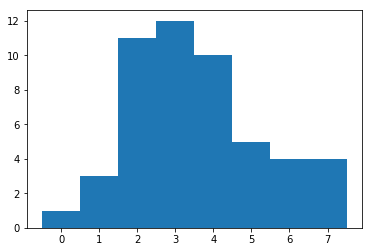

In [7]:
plt.hist(data,bins=np.arange(-0.5,8.5,1))

### 標本分散

In [8]:
data.var()

2.9861224489795921

### 標準偏差

In [9]:
data.std()

1.7280400600042789

## 2.2.データと確率分布の対応関係を眺める
* ポアソン分布

Q. 確率分布とは？

A.
* 確率変数の値とそれが出現する確率を対応させたもの


Q. ポアソン分布で指定できるパラメーターは？

A.
* 分布の平均

In [10]:
np.sqrt(data.var())

1.7280400600042789

### 平均3.56のポアソン分布を作成する

In [11]:
y = range(10)
prob = sct.poisson.pmf(y,mu=3.56)

In [12]:
prob

array([ 0.02843882,  0.10124222,  0.18021114,  0.21385056,  0.190327  ,
        0.13551282,  0.08040427,  0.04089132,  0.01819664,  0.00719778])

### 図示する

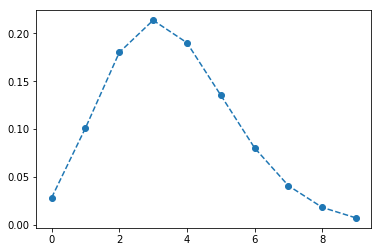

In [13]:
plt.plot(y,prob,"o--")

### 前述のヒストグラムとポアソン分布を重ねて表示する

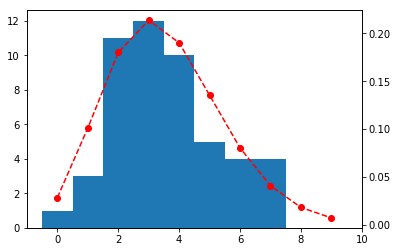

In [14]:
fig,ax1=plt.subplots()

ax1.hist(data,bins=[i-0.5 for i in range(11)])
ax2=ax1.twinx()
ax2.plot(y,prob,"ro--")

plt.show()

* 図の見た目による納得気分をもう少し定量的に示す方法を考える

## 2.3.ポアソン分布とは何か？
Q. ポアソン分布の定義(数式)は？

A.
$$
p(y|\lambda) = \frac{\lambda^ye^{-\lambda}}{y!}
$$

Q. ポアソン分布の性質は？

A.
* yは0以上の整数を取り、すべてのyについて和を取ると1になる
* 確率分布の平均はλである(λ≧0)
* 分散と平均は等しい

## 2.4.ポアソン分布のパラメーターの最尤推定
* 確率分布のパラメーターを、観測データに基づいて推定する方法について

Q. 最尤推定法とは？

A.
* 尤度なる「あてはまりの良さ」を表す統計量を最大にするようなパラメーターの値を探そうとする、パラメータ推定方法
* 尤度の実態は、あるλの値を決めた時に、すべての個体iについての$p(y_i|\lambda)$の積
* どのような確率分布を使った統計モデルにも適用できる

Q. 例題の尤度$L(\lambda)$の計算式は？

A.
$$
L(\lambda) = \prod_{i} \frac{\lambda^ye^{-\lambda}}{y!}
$$
* 積になるのは50個の事象が同時に真である確率を求めたいから


Q. 上記を対数変換した対数尤度関数は？

A.
$$
\log L(\lambda) = \sum_{i}(y_i \log \lambda - \lambda - \sum_{k}^{y_i} \log k)
$$

* この対数尤度関数を使ってパラメータを最尤推定する


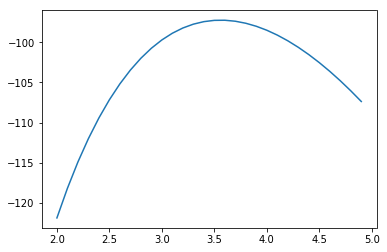

In [15]:
logL = lambda m: sum(sct.poisson.logpmf(data,m))
lmd = [i for i in np.arange(2,5,0.1)]
logL_list = [logL(m) for m in lmd]
plt.plot(lmd,logL_list)

Q. 最尤推定量とは？

A.
* 対数尤度あるいは尤度が最大になる$\hat{\lambda}$
* 具体的に算出された値を最尤推定値と呼ぶ


* 実際のデータ解析で使う統計モデルはもっと複雑になるため、簡単には最尤推定量を導出できない

### 2.4.1.擬似乱数と最尤推定値のばらつき

#### ポアソン乱数を発生させる

In [16]:
a =np.random.poisson(lam=3.5,size=50)
d = pd.Series(a)

(array([  1.,   5.,  10.,  10.,   9.,   7.,   1.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Patch objects>)

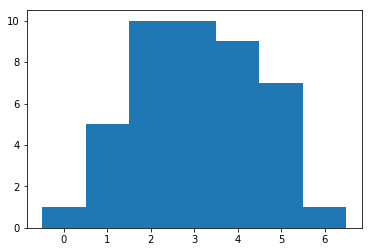

In [17]:
plt.hist(d,bins=np.arange(d.max())-0.5)

#### ランダムに最尤推定値を3000回計算する

In [18]:
count = list()
for i in range(3000):
    a = np.random.poisson(lam=3.5,size=50)
    count.append(a.mean())

(array([   7.,   58.,  266.,  540.,  896.,  725.,  339.,  144.,   20.,    5.]),
 array([ 2.58 ,  2.774,  2.968,  3.162,  3.356,  3.55 ,  3.744,  3.938,
         4.132,  4.326,  4.52 ]),
 <a list of 10 Patch objects>)

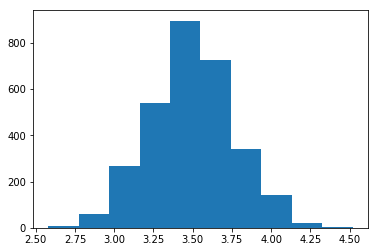

In [19]:
plt.hist(count)

* 調査個体数が大きいほど推定値の標準誤差は小さくなる
* ここで使った方法は真のモデルを知ってなければ使えない。推定値のばらつきを見積もるには、たまたま得られた観測データから推定された値にすぎない$\hat{\lambda}$を利用して乱数を発生させる。

## 2.5.統計モデルの要点：乱数発生・推定・予測

1. ばらつきのあるデータを見た時に、確率分布から発生下と考えれば扱いやすそうだ、と考えることが統計モデリングの第一歩
2. 確率分布を仮定する（ポアソン分布など）
3. 推定、あてはめ：パラメーター$\lambda$はどんな値か
4. 予測：推定で得られた統計モデルを用いて次のデータの分布を見積もる
    1. 次に得られる応答変数の平均だけを示す
    2. 平均だけでなく、次に得られるデータはこの範囲に散らばるはずという予測区間も示す
5. 検証：予測の良さ（推定されたモデルが新しく得られたデータにどれぐらいよく当てはまるか）

### 2.5.1.データ解析に置ける推定・予測の役割

* 推定されたモデルを使って予測するためには、自分が使っている統計モデルをよく理解していなければならない。
* 推定結果を図示することが重要
* 科学で使われるモデルの良さとは、そのモデルの予測の良さによって決まります。また、推定されたモデルによる予測を試みることで、自分が使っている近似的・現象論的な統計モデルの理解が深まり、またその不備が判明することもあります。
* 推定したモデルによる予測は重要。推定しただけ、あるいは「検定」しただけでは十分とは言えない

## 2.6.確率分布の選び方
|  | 離散・連続 | 範囲 |標本分散、標本平均の関係|
|:-----------|------------:|:------------:|:------------:|
| ポアソン分布       | 離散| ゼロ以上の範囲、上限特になし | 平均≈分散|
| 二項分布     | 離散 | ゼロ以上で有限の範囲 |分散は平均の関数|
| 正規分布  | 連続   | [-∞,+∞]  |分散と平均は無関係|
| ガンマ分布| 連続  | [0,+∞] |分散は平均の関数|

### 2.6.1.もっと複雑な確率分布が必要か？
* そんなに多種類の確率分布を使いこなさなくても良い。統計モデリングの工夫次第
* 「データ化されていない個体差、見なかった個体差」がある場合には、確率分布を混ぜ合わせることで解決。

## 2.7. この章のまとめと参考文献
* 確率分布には様々なものがあるので、データの特徴に合わせて確率分布を選ぶ
* どのような確率分布を使った統計モデルでも、「データに対するあてはまりの良さ」を対数尤度であらわすことができ、最尤推定とは対数尤度を最大にするようなパラメーターを探し出すことである
* 推定とは、今得られたデータに当てはまるようなパラメータを探し出すこと。予測とは、次に得られるデータへの当てはまりを重視すること。
* 簡単な確率分布を「混ぜ合わせる」ことで、現実に見られる複雑なばらつきに対処できる

## 課題
* ポアソン分布と考えられそうなデータを見つけ、推定用、予測用(検証用)に分割する。
* 推定用のデータを用いて、ポアソン分布のパラメータの推定を行う
* 予測用データに対して予測を行い、当てはまりの良さを確認する